<a href="https://colab.research.google.com/github/OlehVorobiov/Math-2024-25-Winter/blob/main/Notebooks_EN/02_Analytic_Geometry/07_Planes_in_Space/07_Planes_in_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tasks related to equations of planes in space

**Visualize each task.** - Python, GeoGebra, Wolfram Alpha, ...

* The plane passes through points $A(1, 2, 3)$, $B(3, 4, 5)$, and $C(2, 1, 4)$. Find the equation of the plane.
* The plane passes through point $A(1, 2, 3)$ and is parallel to the plane $2x + 3y + 4z = 5$. Find the equation of the plane.
* The plane passes through point $A(1, 2, 3)$ and is perpendicular to the normal vector $\vec{n} = [2, 3, 4]$. Find the equation of the plane.
* We have two planes $2x + 3y + 4z = 5$ and $3x + 4y + 2z = 6$. Find the line of intersection of these planes.
* Write the equation of the plane passing through point $A(1, 2, 3)$ and parallel to vectors $\vec{v_1} = [1, 0, 1]$ and $\vec{v_2} = [0, 1, -1]$.
* We have the plane $2x + 3y + 4z = 5$. Find an example of a plane parallel and perpendicular to it.
* We have the plane $2x + 3y + 4z = 5$ and point $A(1, 2, 3)$. Find the distance from point $A$ to this plane.
* The plane intersects the coordinate axes at points $A(2, 0, 0)$, $B(0, 3, 0)$, and $C(0, 0, 4)$. Find the equation of the plane.
* Calculate the angle between the plane $x + y + z = 1$ and the plane $x = 0$ (i.e., the $yz$ plane).
* Find the vector perpendicular to the plane $x + y + z = 1$.

Cross product of AB and AC is Matrix([[4], [0], [-4]])
Eq(1.0*x - 1.0*z + 2.0, 0)


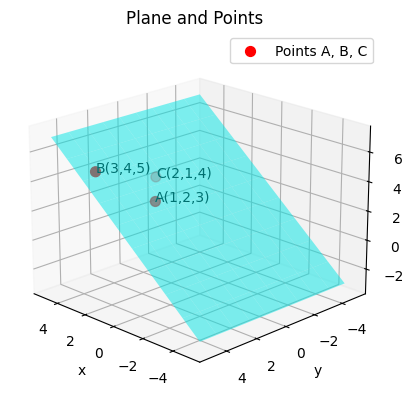

In [2]:
#The plane passes through points  A(1,2,3) ,  B(3,4,5) , and  C(2,1,4) . Find the equation of the plane.

import sympy as sp

import matplotlib.pyplot as plt
from sympy import symbols, Eq, expand, solve
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

class EnhancedEq(Eq):
    def __add__(self, other):
        return EnhancedEq(self.lhs + other.lhs, self.rhs + other.rhs)

    def __sub__(self, other):
        return EnhancedEq(self.lhs - other.lhs, self.rhs - other.rhs)

    def __mul__(self, scalar):
        return EnhancedEq(scalar * self.lhs, scalar * self.rhs)

    def __rmul__(self, scalar):
        return self.__mul__(scalar)

    def simplify(self):
        return EnhancedEq(expand(self.lhs), expand(self.rhs))

    def substitute(self, *args, **kwargs):
        return EnhancedEq(self.lhs.subs(*args, **kwargs), self.rhs.subs(*args, **kwargs))

    def solve_for(self, symbol):
        return solve(self, symbol)



x, y, z = symbols('x y z')

A = sp.Matrix([1, 2, 3])
B = sp.Matrix([3, 4, 5])
C = sp.Matrix([2, 1, 4])

#Find the vectors AB and AC

AB = sp.Matrix([B[0]-A[0], B[1]-A[1], B[2]-A[2]])
AC = sp.Matrix([C[0]-A[0], C[1]-A[1], C[2]-A[2]])

#Calculating the cross product
Cross = sp.Matrix([AB[1]*AC[2]-AB[2]*AC[1], AB[2]*AC[0]-AB[0]*AC[2], AB[0]*AC[1]-AB[1]*AC[0]])
print("Cross product of AB and AC is", Cross)

eq = EnhancedEq(Cross[0]*(x - A[0]) + Cross[1]*(y - A[1]) + Cross[2]*(z - A[2]), 0)
eq = eq.__mul__(1/4)
print(eq)


#Visualising

def plane_equation(x, y, a, b, c, d):
    """
    Calculates the z-values for the plane equation.

    Args:
        x: x-coordinates.
        y: y-coordinates.
        a, b, c, d: Coefficients of the plane equation (ax + by + cz + d = 0).

    Returns:
        z-coordinates.
    """
    return (-a * x - b * y - d) / c

# Plane coefficients from x - z + 2 = 0
# Which is equivalent to: 1x + 0y - 1z + 2 = 0
a, b, c, d = 1, 0, -1, 2

# Create a grid of x and y values
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)

# Calculate z values using the plane equation
Z = plane_equation(X, Y, a, b, c, d)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
ax.plot_surface(X, Y, Z, alpha=0.5, color='cyan')  # alpha for transparency, color for distinction

# Plot points A, B, and C
ax.scatter([1, 3, 2], [2, 4, 1], [3, 5, 4], color='red', s=50, label='Points A, B, C')

# Label the points
ax.text(1, 2, 3, 'A(1,2,3)', color='black')
ax.text(3, 4, 5, 'B(3,4,5)', color='black')
ax.text(2, 1, 4, 'C(2,1,4)', color='black')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Plane and Points')

# Adjust the viewing angle
ax.view_init(elev=20, azim=135)  # Change these values to alter the angle

# Add legend
ax.legend()

# Show the plot
plt.show()



Eq(2*x + 3*y + 4*z, 20)
The equation 2x + 3y + 4z = 20


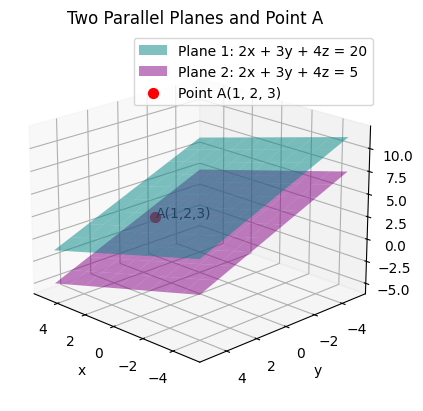

In [52]:
#The plane passes through point  A(1,2,3)  and is parallel to the plane  2x+3y+4z=5 . Find the equation of the plane.
x, y, z = symbols('x y z')
d = symbols('d')

A = sp.Matrix([1, 2, 3])
eq = EnhancedEq(2*x + 3*y + 4*z, 5)

#Since the planes are parallel, the only difference is d
eq1 = EnhancedEq(2*A[0] + 3*A[1] + 4*A[2], d)
d_sol = eq1.solve_for(d)[0]

eq2 = EnhancedEq(2*x + 3*y + 4*z, d_sol)

print(eq2)
print("The equation 2x + 3y + 4z = 20")





# Create a grid of x and y values
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First plane (original plane)
Z1 = plane_equation(X, Y, 2, 3, 4, -20)  # Plane equation 2x + 3y + 4z = 20
ax.plot_surface(X, Y, Z1, alpha=0.5, color='cyan', label='Plane 1: 2x + 3y + 4z = 20')

# Second plane (parallel plane)
Z2 = plane_equation(X, Y, 2, 3, 4, -5)  # Plane equation 2x + 3y + 4z = 5
ax.plot_surface(X, Y, Z2, alpha=0.5, color='magenta', label='Plane 2: 2x + 3y + 4z = 5')

# Plot point A(1, 2, 3)
ax.scatter(1, 2, 3, color='red', s=50, label='Point A(1, 2, 3)')

# Label the point
ax.text(1, 2, 3, 'A(1,2,3)', color='black')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Two Parallel Planes and Point A')

# Adjust the viewing angle
ax.view_init(elev=20, azim=135)

# Add legend
ax.legend()

# Show the plot
plt.show()


Eq(2*x + 3*y + 4*z, 20)
The equation 2x + 3y + 4z = 20


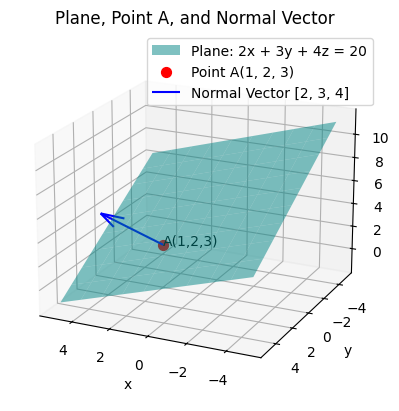

In [58]:
#The plane passes through point  A(1,2,3)  and is perpendicular to the normal vector  n⃗ =[2,3,4] . Find the equation of the plane.
x, y, z = symbols('x y z')
d = symbols('d')
A = sp.Matrix([1, 2, 3])
n = sp.Matrix([2, 3, 4])


eq1 = EnhancedEq(n[0]*A[0] + n[1]*A[1] + n[2]*A[2], d)
d_sol = eq1.solve_for(d)[0]

eq2 = EnhancedEq(2*x + 3*y + 4*z, d_sol)
print(eq2)
print("The equation 2x + 3y + 4z = 20")



def plane_equation(X, Y, a, b, c, d):
    """
    Calculate the Z-values for the plane equation ax + by + cz = d
    """
    return (d - a * X - b * Y) / c

# Create a grid of x and y values
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First plane (original plane)
Z1 = plane_equation(X, Y, 2, 3, 4, 20)  # Plane equation 2x + 3y + 4z = 20
ax.plot_surface(X, Y, Z1, alpha=0.5, color='cyan', label='Plane: 2x + 3y + 4z = 20')

# Plot point A(1, 2, 3)
ax.scatter(1, 2, 3, color='red', s=50, label='Point A(1, 2, 3)')

# Add the normal vector starting at point A
ax.quiver(1, 2, 3, 2, 3, 4, color='blue', length=5, normalize=True, label='Vector')

# Label the point
ax.text(1, 2, 3, 'A(1,2,3)', color='black')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Plane, Point A, and Normal Vector')

# Adjust the viewing angle
ax.view_init(elev=20, azim=115)

# Add legend
ax.legend()

# Show the plot
plt.show()


Eq(8*t + y, 3)
3 - 8*t
Eq(-60*t + 6*x + 27, 15)
10*t - 2


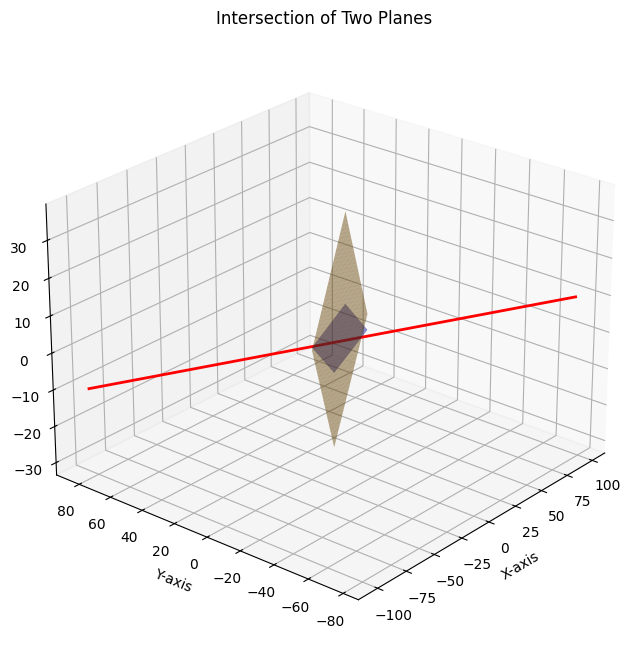

In [31]:
#We have two planes  2x+3y+4z=5  and  3x+4y+2z=6 . Find the line of intersection of these planes.

x, y, z = symbols('x y z')

eq1 = EnhancedEq(2*x + 3*y + 4*z, 5)
eq2 = EnhancedEq(3*x + 4*y + 2*z, 6)

#Let z = t
t = symbols('t')

eq1 = eq1.substitute(z, t)
eq2 = eq2.substitute(z, t)

#Solving the equations
eq1 = eq1.__mul__(3)
eq2 = eq2.__mul__(2)

eq3 = eq1 - eq2
print(eq3)

y_sol = eq3.solve_for(y)[0]
print(y_sol)

eq4 = eq1.substitute(y, y_sol)
print(eq4)

x_sol = eq4.solve_for(x)[0]
print(x_sol)

Point = np.array([-2, 3, 0])
Vector = np.array([10, -8, 1])






# Define the line using the parametric equation
t_vals = np.linspace(-10, 10, 100)
line_points = Point[:, None] + Vector[:, None] * t_vals

# Define the planes for plotting
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_plane, y_plane = np.meshgrid(x_vals, y_vals)

z1_plane = (5 - 2*x_plane - 3*y_plane) / 4  # Plane 1: 2x + 3y + 4z = 5
z2_plane = (6 - 3*x_plane - 4*y_plane) / 2  # Plane 2: 3x + 4y + 2z = 6

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the planes
ax.plot_surface(x_plane, y_plane, z1_plane, alpha=0.5, color='blue', edgecolor='none', label="Plane 1")
ax.plot_surface(x_plane, y_plane, z2_plane, alpha=0.5, color='orange', edgecolor='none', label="Plane 2")

# Plot the line
ax.plot(line_points[0], line_points[1], line_points[2], color='red', label="Line of Intersection", linewidth=2)

# Labels and visualization settings
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title("Intersection of Two Planes")
ax.view_init(elev=25, azim=220)  # Adjust view angle

plt.show()

In [37]:
#Write the equation of the plane passing through point  A(1,2,3)  and parallel to vectors  v1→=[1,0,1]  and  v2→=[0,1,−1] .
x, y, z = symbols('x y z')
A = sp.Matrix([1, 2, 3])
v1 = sp.Matrix([1, 0, 1])
v2 = sp.Matrix([0, 1, -1])

Cross = sp.Matrix([v1[1]*v2[2]-v1[2]*v2[1], -(v1[0]*v2[2]-v1[2]*v2[0]), v1[0]*v2[1]-v1[1]*v2[0]])
print(Cross)

eq = EnhancedEq(Cross[0]*(x - A[0]) + Cross[1]*(y - A[1]) + Cross[2]*(z - A[2]), 0)
eq = eq.__mul__(-1)
print(eq)

Matrix([[-1], [1], [1]])
Eq(x - y - z + 4, 0)


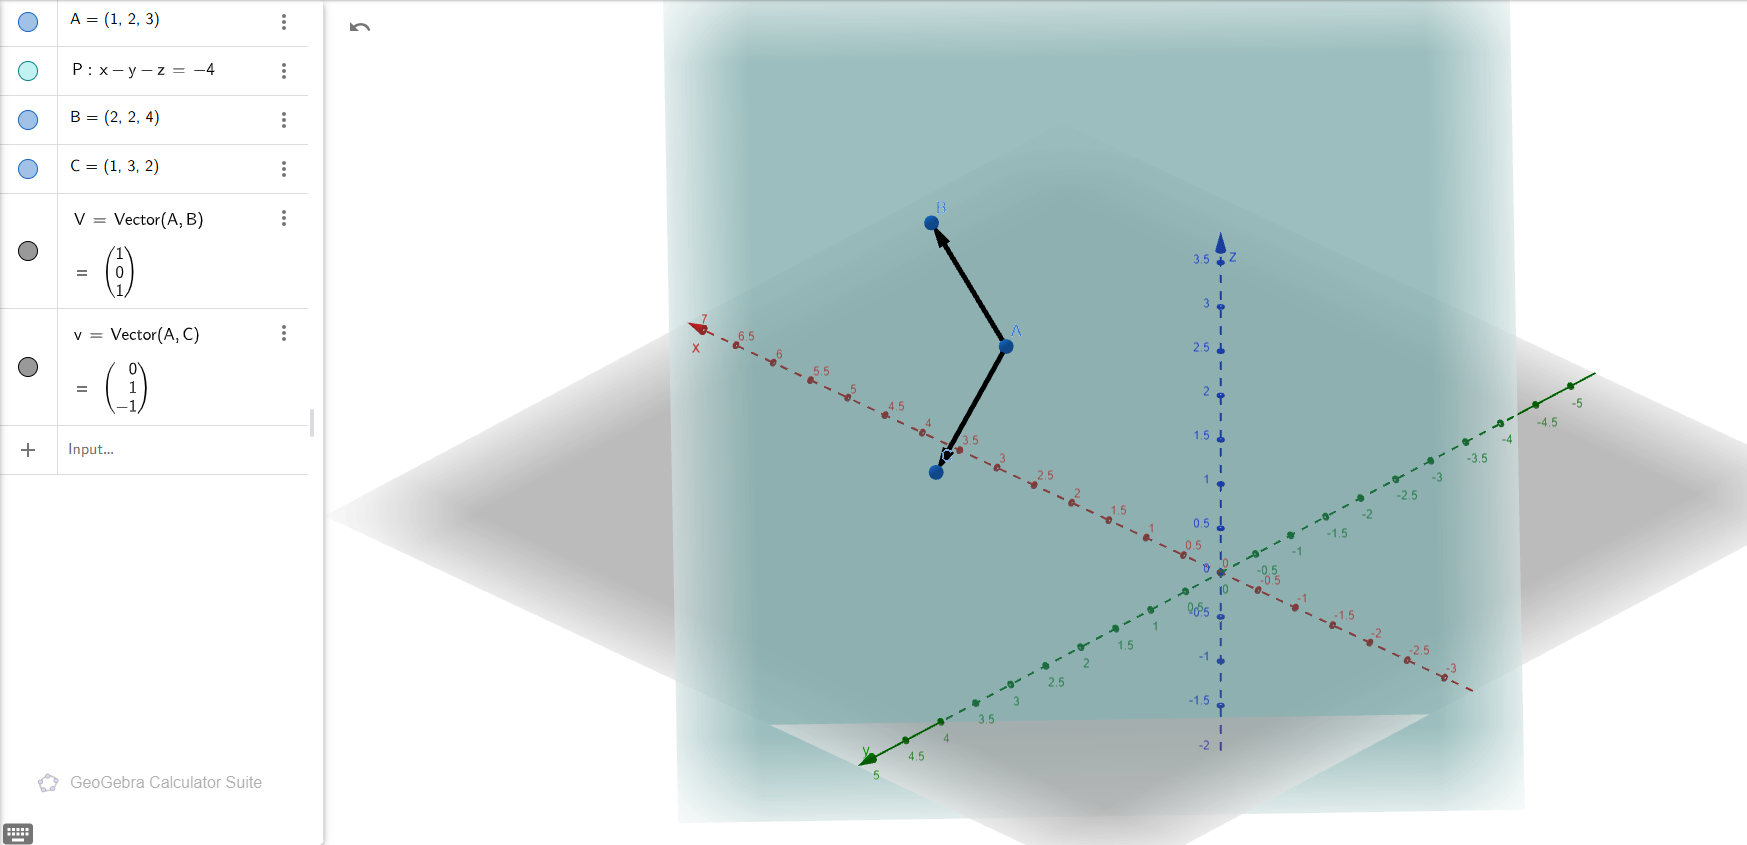

In [42]:
#We have the plane  2x+3y+4z=5 . Find an example of a plane parallel and perpendicular to it.

x, y, z = symbols('x y z')
d = symbols('d')

eq = EnhancedEq(2*x+3*y+4*z, 5)

#Parallel plane
eq1 = EnhancedEq(2*x+3*y+4*z, 2)

#Perpendicular plane
a,b,c
a = 1
b = 2
c = -2
Dot = EnhancedEq(2*a+3*b+4*c, 0)
print(Dot)

eq2 = EnhancedEq(a*x + b*y + c*z, d)
#Pick any point => P(0,0,0) => d = 0
d_sol = 0
eq2 = eq2.subs(d, d_sol)
print(eq1)
print(eq2)

print("The equation of a parallel plane is: 2x+3y+4z=2")
print("The equation of a parallel plane is: x+2y-2z=0")

True
Eq(2*x + 3*y + 4*z, 2)
Eq(x + 2*y - 2*z, 0)


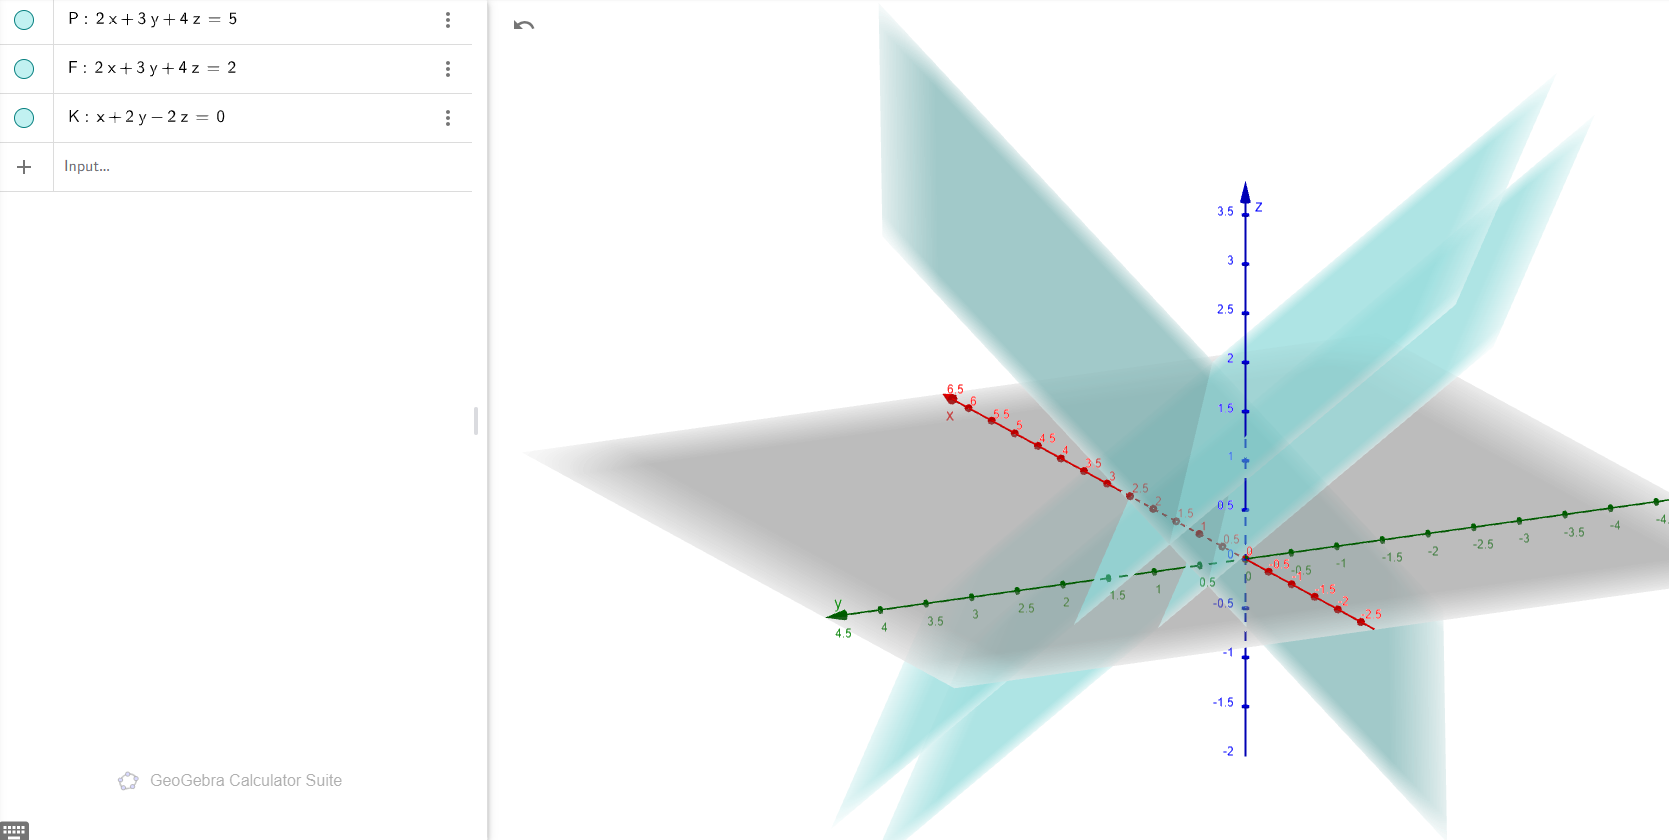

In [46]:
#We have the plane  2x+3y+4z=5  and point  A(1,2,3) . Find the distance from point  A  to this plane.
import math
x, y, z = symbols('x y z')
plane_equation = 2*x + 3*y + 4*z - 5
point_A = sp.Matrix([1, 2, 3])
distance = plane_equation.subs([(x, point_A[0]), (y, point_A[1]), (z, point_A[2])])/math.sqrt(2**2 + 3**2 + 4**2)
print("Distance from point A to the plane:", distance)



Distance from point A to the plane: 2.78543007265578


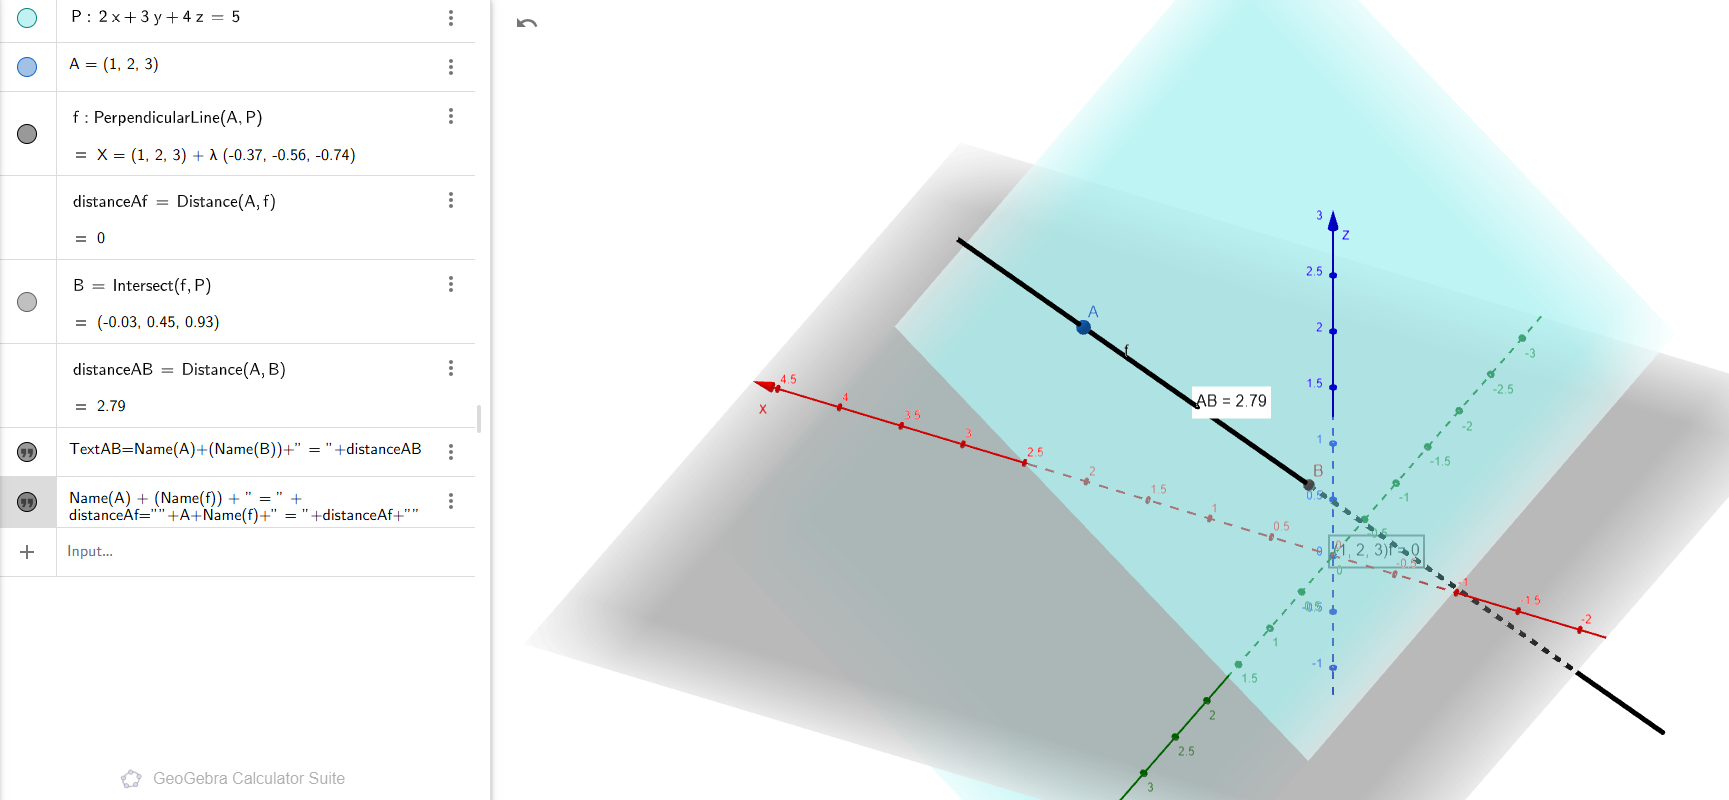

In [59]:
#The plane intersects the coordinate axes at points  A(2,0,0) ,  B(0,3,0) , and  C(0,0,4) . Find the equation of the plane.
x, y, z = symbols('x y z')
A = sp.Matrix([2,0,0])
B = sp.Matrix([0,3,0])
C = sp.Matrix([0,0,4])


eq = EnhancedEq(x/A[0] + y/B[1] + z/C[2], 1)
eq = eq.__mul__(12)

print(eq)

print("The equation of the plane is 6x+4y+3z")


Eq(6*x + 4*y + 3*z, 12)
The equation of the plane is 6x


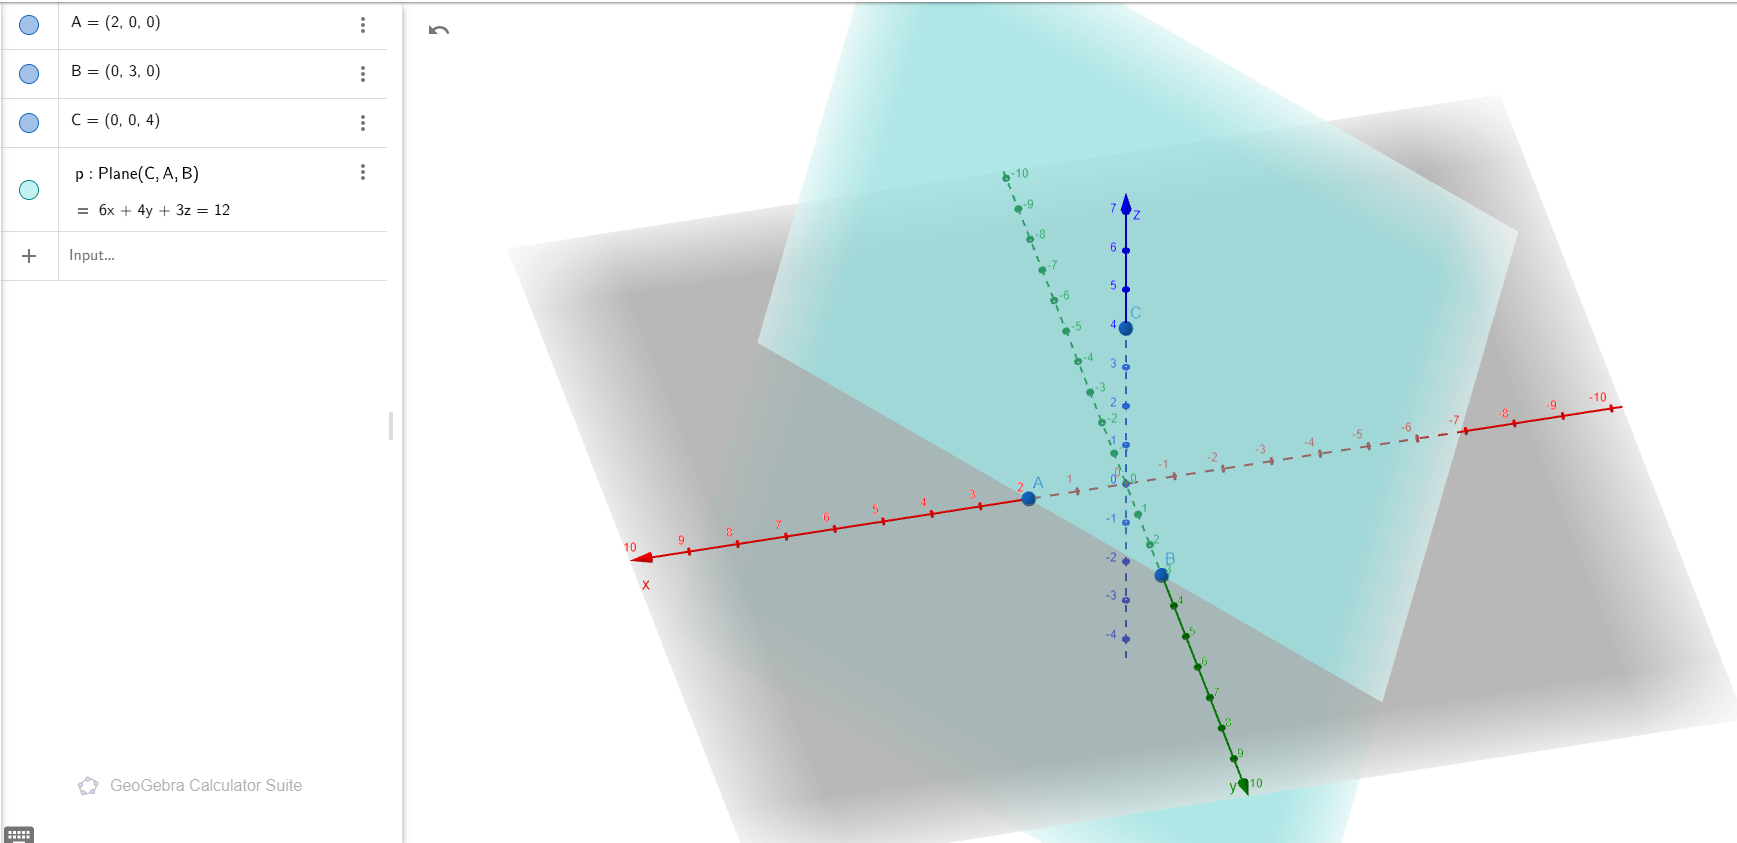

In [67]:
#Calculate the angle between the plane  x+y+z=1  and the plane  x=0  (i.e., the  yz  plane).
x, y, z = symbols('x y z')

eq1 = EnhancedEq(x+y+z, 1)
eq2 = EnhancedEq(x, 0)

#Normal vectors
n1 = sp.Matrix([1,1,1])
n2 = sp.Matrix([1,0,0])

#Calculating the cos and the angle using the formula
cos = (n1[0]*n2[0]+n1[1]*n2[1]+n1[2]*n2[2])/(math.sqrt(n1[0]**2+n1[1]**2+n1[2]**2)*math.sqrt(n2[0]**2+n2[1]**2+n2[2]**2))
angle = math.acos(cos)
angle_degrees = math.degrees(angle)
print(cos)
print("The angle between the planes is",angle_degrees)

0.577350269189626
The angle between the planes is 54.735610317245346


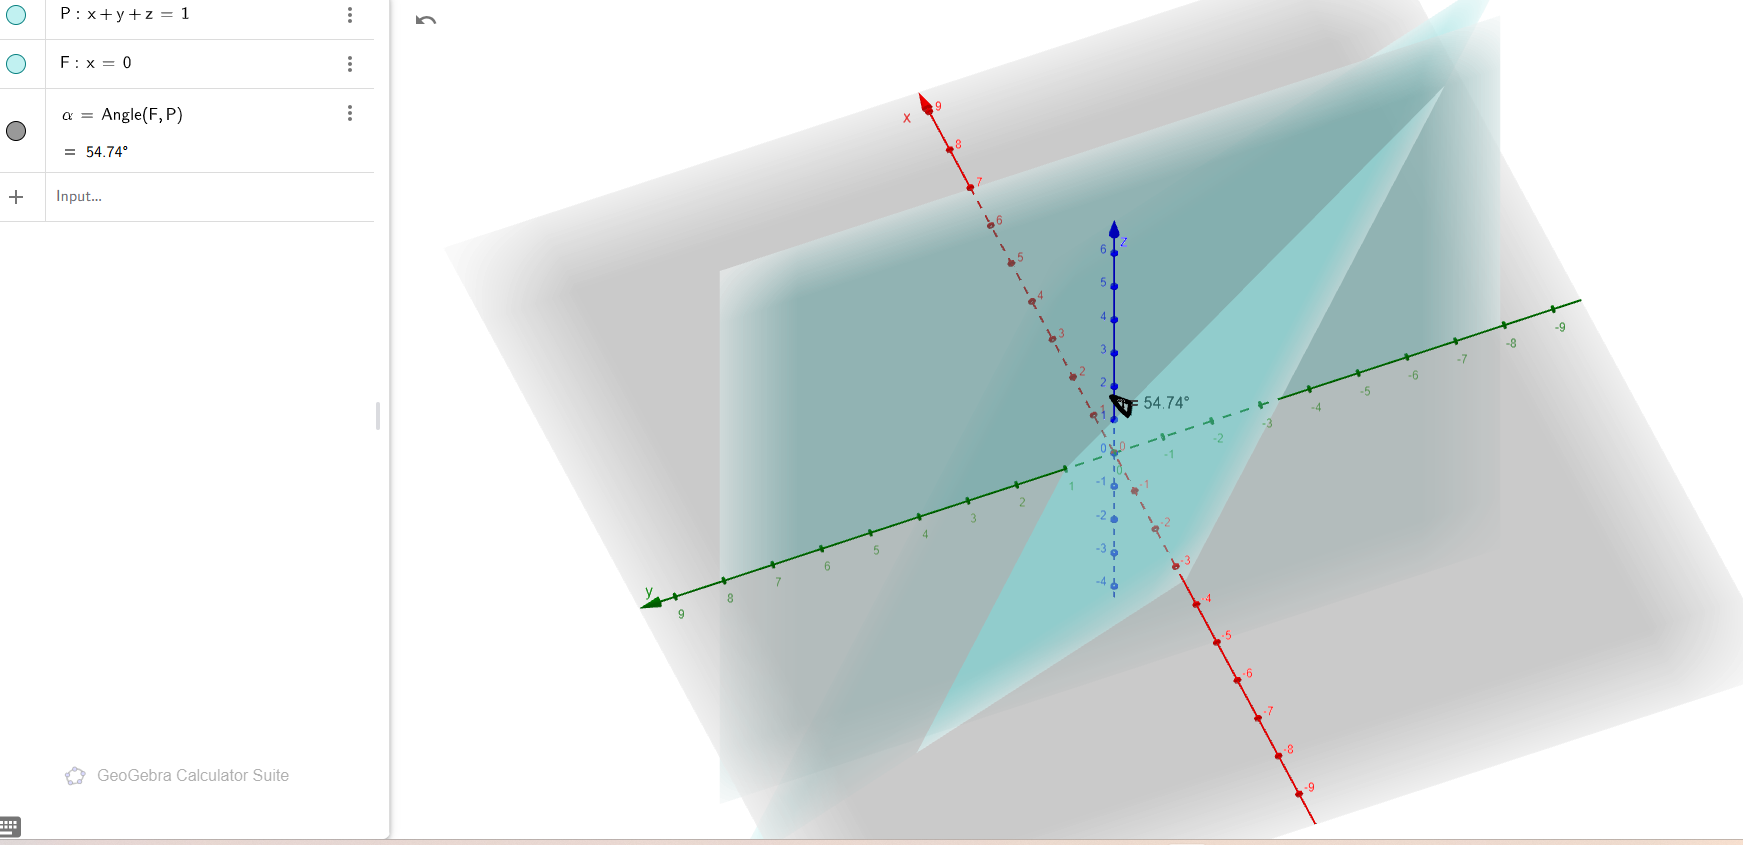

In [69]:
#Find the vector perpendicular to the plane  x+y+z=1 .

x, y, z = symbols('x y z')
eq = EnhancedEq(x+y+z, 1)

#The vector that is perpendicular to the plane is the normal vector
n = sp.Matrix([1,1,1])

print("The vector perpendicular to the plane is", n)

The vector perpendicular to the plane is Matrix([[1], [1], [1]])


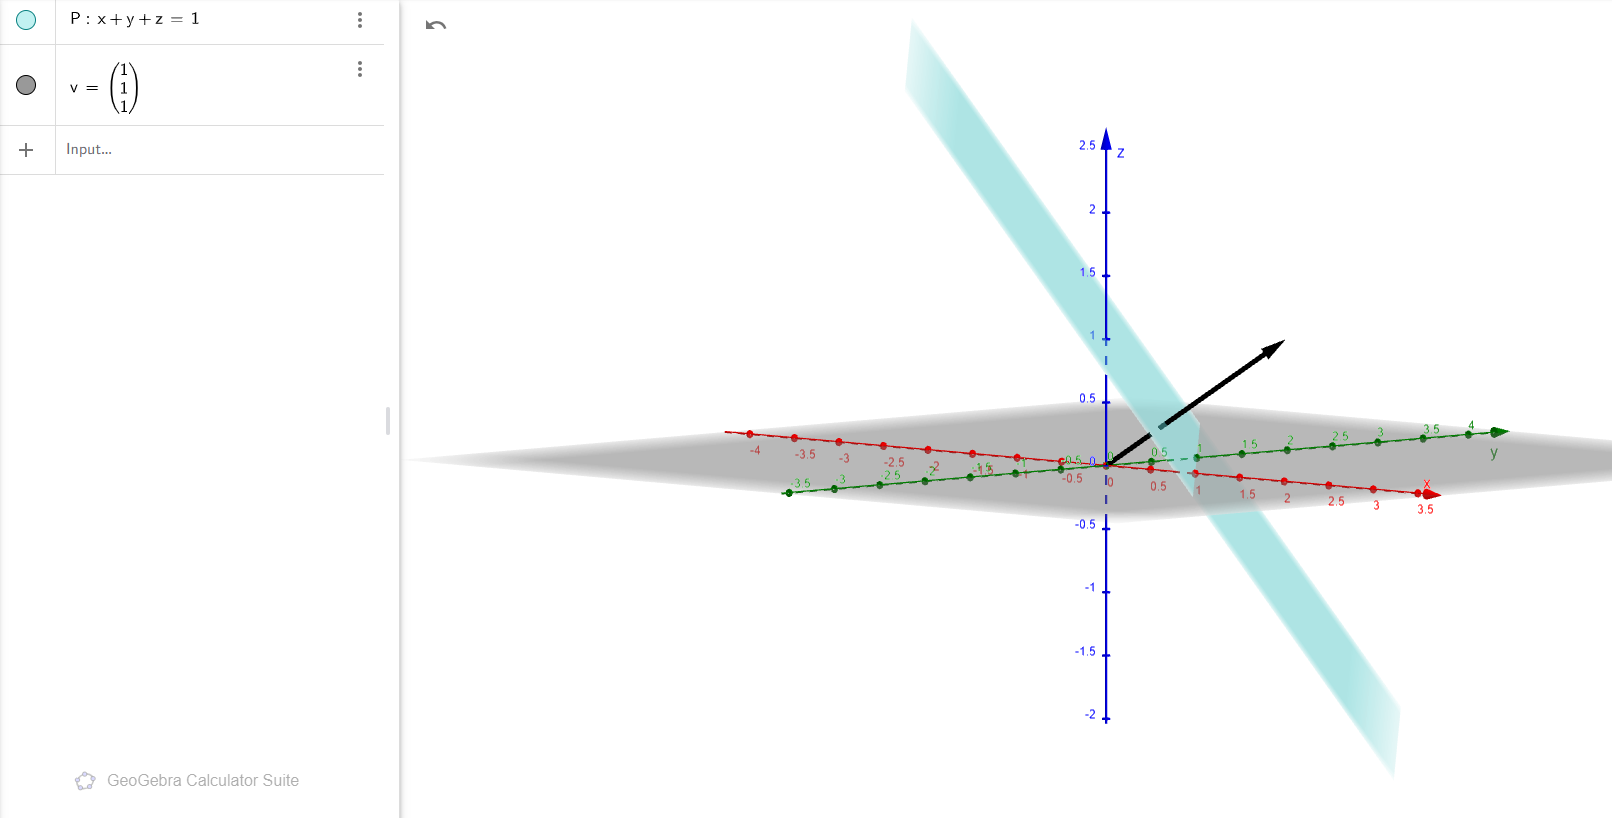